# Kernel Sandbox

A notebook for exploring kernels, hyperparameters and perhaps even helping understanding of GP's.

## The GP

A GP can be uniquely defined in terms of a mean function $m({\bf t})$ and a Kernel function $K({\bf t}, {\bf t})$.  As we are focused on the interesting properties of GP's and their Kernels we will assume from now on that $m({\bf t}) = 0$.  In practice this can be achieved by subtracting a mean function from a dataset before (or simulataneously) applying the GP. 

In the following notebook we will not be working with GP's but instead we will focus on the properties of kernels and multivariate Gaussian distributions.  However, remember that a GP is an extension of the multivariate Gaussian distribution and that GP's have similar properties to the multivariate Gaussians.

## Defining a kernel

We can define a kernel or covariance function as we wish, so long as we ensure the covariance matrix is positive semidefinite.  The vanilla flavour of kernel is the squared exponential.  This is defined as:

$ K({\bf t}, {\bf t}) = \lbrace k(t_i, t_j) \rbrace_{i,j=1...n}$,

where,

$k(t_i, t_j) = \sigma^{2} \exp \left( -\frac{1}{2 l^2} | t_i - t_j |^{2} \right)$.

Write a function below that takes as arguments: $t_1$ a list of times of measurement; $t_2$ a list of times of measurements or predictions; and params where params[0] is $\sigma$ and params[1] is $l$.  Your function should then return a covariance matrix for the sqaured exponential kernel.

You may find it useful to look at the np.subtract.outer function (I can only find docs on the same function using ufunc https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ufunc.outer.html). For what we are doing here it is perfectly acceptable to code this up using nested for loops.

Here is an example of a (useless) Python function:

In [8]:
import numpy as np

def random_number_generator(argument1):
    print(argument1) # Prints the arguments
    return 53 # Returns a 'random' but awesome number

x = random_number_generator('Everything is Awesome!')
print(f'x = {x}')
print(f'x (hexidecimal) = {x:x}')
print(f'x (binary) = {x:b}')

Everything is Awesome!
x = 53
x (hexidecimal) = 35
x (binary) = 110101


## Drawing from a multivariate normal distribution using Numpy

Numpy has a function that allows us to draw random deviates from a multivariate normal distribution:

https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.multivariate_normal.html

The inputs to the function are a 1D array of the means and a 2D array which is the covariance matrix.

Here is a trivial example:

In [10]:
mu = [0, 0, 0]  # The means
cov = [[1, 0.5, 0.0], [0.5, 1, 0.5], [0.0, 0.5, 1]]  # The covariance matrix
output = np.random.multivariate_normal(mu, cov) # The function call
output

array([-0.51553951,  0.89097155,  0.67200269])

Plotting this output is straightforward with matplotlib's pyplot:

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html

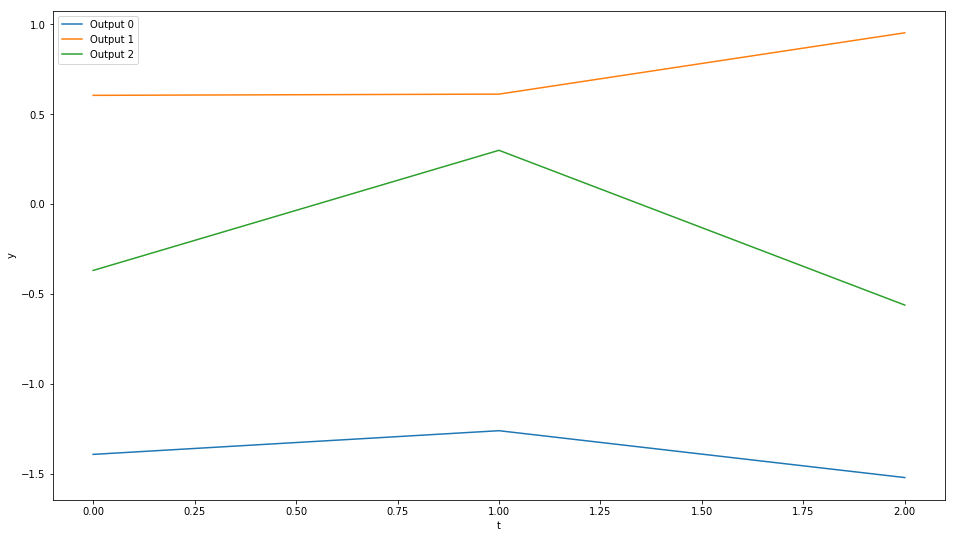

In [11]:
import matplotlib.pyplot as plt
t = np.arange(len(output))
fig, ax = plt.subplots(figsize=[16,9])
for i in range(3):
    output = np.random.multivariate_normal(mu, cov)
    ax.plot(t, output, label=f'Output {i}')
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.legend()
plt.show()

## Exploring the kernel

Let's take a look at the typical properties of our kernel.  A GP is the generalisation of the multivariate Gaussian distribution to infinitely many variables.  We want to consider only finite numbers of variables.  This is just a multivariate Gaussian distribution.  Hence, a straightforward way to visualize a kernel is to draw randomly from a multivariate Gaussian distribution with a covariance matrix of $K({\rm t_1}, {\rm t_1})$. 

Using matplotlib.pyplot as plt, create a figure that shows three draws from the standard exponential kernel with $\sigma = 1$ and $l=10$.

Use the times given in the cell below.

In [12]:
import matplotlib.pyplot as plt
t = np.arange(-100,100,1)
theta = [1.0, 10.0]

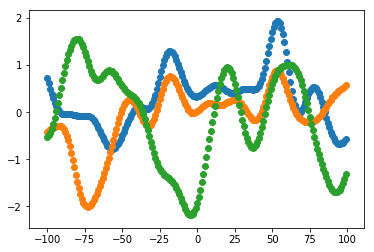

It is fairly straightforward to imagine what might happen if $\sigma$ was to change.  If you are unsure what will happen use the space here to explore.

It is also possible to imagine what might happen with changes in the length scale, but here we will show this.

Using the times given already, produce a plot with a line for each of the length scales defined below.

Play around with the length scales as you need to get a feel for the properties of the timeseries given by the differnet kernel properties.

In [14]:
thetas = [[1.0, l] for l in 10.**np.arange(0, 3, 1)]

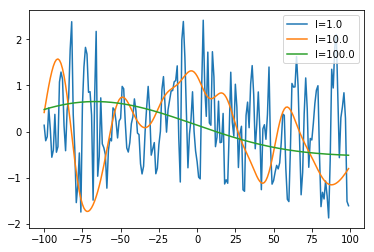

## Adding in constraint from data

This step is a natural (for me) continuation to the exploration of the kernel.  What if we had data and only want to consider the draws from the multivariate Gaussian distributions that are consistent with the data.

In a GP implementation this concept of drawing from the distribution is replaced with a marginalisation.  However, it might be helpful to explore the concepts of draws from the distribution of functions.  

Start by plotting 100 functions drawn from a multivariate Gaussian distribution using the squared exponential kernal function with the theta defined below.  When plotting, set alpha=0.2 as an argument to the plot function.

In [16]:
mu = np.zeros(len(t))
theta = [1.0, 10.0]

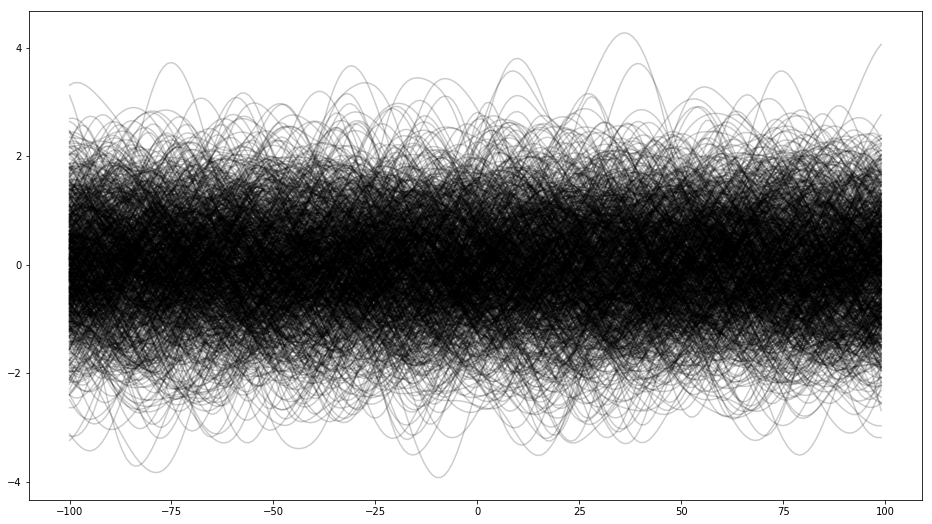

Next, reuse the code from above but now introduce the contraint from a single data point.  The values for the data point are given below.

This time calculte the likelihood of getting the data given the model.  Only plot the model if a unique random uniform deviate is less than the likelihood for each draw.  (This could also be achieved in log likelihood if you wish)

$p({\bf y_1}) = \operatorname{det}(2\pi A)^{-\frac{1}{2}} \, \exp \left( { -\frac{1}{2}\mathbf{y_1} A^{-1}\mathbf{y_1} } \right)$

$\log p({\bf y_1}) = -\frac{1}{2} {\bf y_1}^{T} A^{-1} {\bf y_1} - \frac{1}{2} \log|A| - \frac{n}{2} \log 2\pi$

Use the plt.errorbar function to add the data to the plot.

In [18]:
idx = np.array([105])
time = t[idx]
y = np.array([0.0])
yerr = np.array([0.1])
print(f'index {idx}: time {time}: y {y}')

index [105]: time [5]: y [0.]


<ErrorbarContainer object of 3 artists>

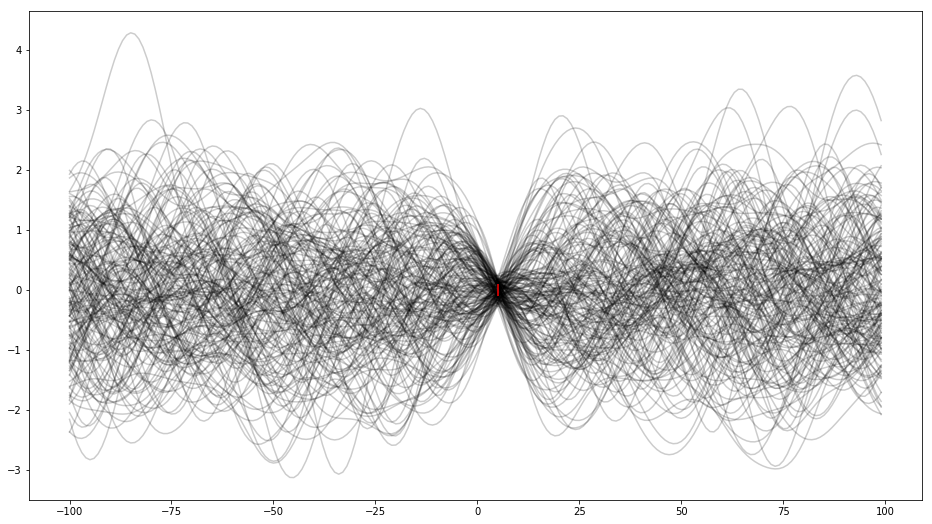

Finally for this worksheet, repeat the above but with the following extra data points.

You may have to loop over a large number of functions (~10000) before you find even one that is sufficiently likely that it will be plotted.

In [20]:
np.random.seed(42)
npts = 3
idx = [int(n) for n in (np.random.uniform(0, len(t), size=npts))]
time = t[idx]
y = np.array(np.random.randn(npts))
yerr = np.ones(npts) * 0.1

<ErrorbarContainer object of 3 artists>

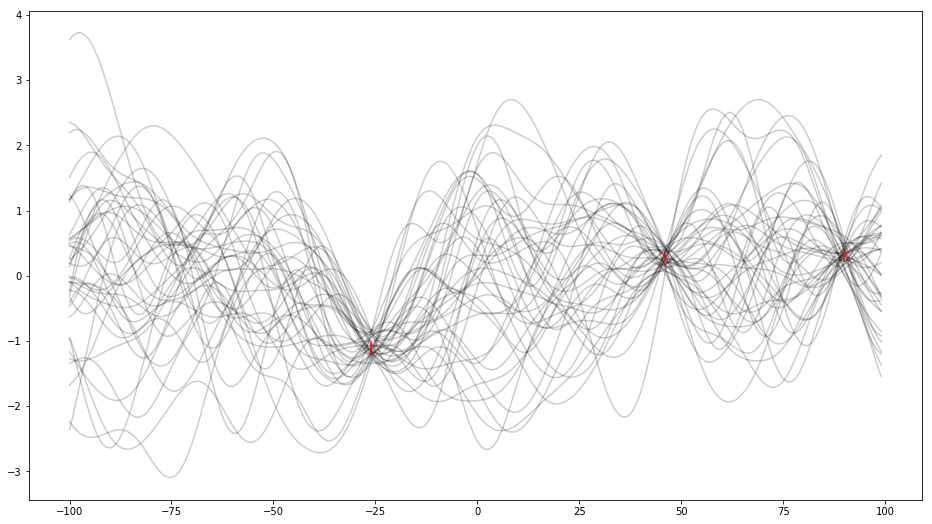

The aim of this notebook was to use the properties of the multivariate normal distribution to solidy some of the concepts of GP's in your minds.  Particularly the action of the kernel and then the introduction of data.

If you feel there are still 'fuzzy' bits in your understanding please ask.  In the next notebook we will focus on building our own GP together with a likelihood function and a predict function.